In [16]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, consumer_secret, access_token, access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [17]:
# Target Account
target_users = ['@FoxNews','@BBCNews' ,'@CBS', '@CNNnewsroom','@nytimes']
target_names=['Fox', 'BBC', 'CBS', 'CNN', 'New York Times']
               


# Variables for holding sentiments
sentiments = []

# Variable for max_id
oldest_tweet = None

#Loop through each organization to find the 100 tweets and associated sentiments

for organization in target_users:
    index=target_users.index(organization)
    organization_name=target_names[index]
    counter=1
    
# Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

    # Get all tweets from home feed
        public_tweets = api.user_timeline(organization)  #, max_id = oldest_tweet)

    # Loop through all tweets 
        for tweet in public_tweets:

        # Print Tweets
        # print("Tweet {counter}: {tweet["text"]})
        
        # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1

            # Add sentiments for each tweet into a list
            sentiments.append({"Organization": organization_name,
                               "Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})

            # Add to counter 
            counter += 1

In [18]:
sentiments

[{'Organization': 'Fox',
  'Date': 'Thu Nov 08 19:18:44 +0000 2018',
  'Compound': 0.0,
  'Positive': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Tweets Ago': 1},
 {'Organization': 'Fox',
  'Date': 'Thu Nov 08 17:02:25 +0000 2018',
  'Compound': -0.6124,
  'Positive': 0.115,
  'Negative': 0.615,
  'Neutral': 0.269,
  'Tweets Ago': 2},
 {'Organization': 'Fox',
  'Date': 'Thu Nov 08 15:14:45 +0000 2018',
  'Compound': -0.7783,
  'Positive': 0.0,
  'Negative': 0.638,
  'Neutral': 0.362,
  'Tweets Ago': 3},
 {'Organization': 'Fox',
  'Date': 'Thu Nov 08 14:22:51 +0000 2018',
  'Compound': 0.7906,
  'Positive': 0.389,
  'Negative': 0.611,
  'Neutral': 0.0,
  'Tweets Ago': 4},
 {'Organization': 'Fox',
  'Date': 'Thu Nov 08 13:43:25 +0000 2018',
  'Compound': -0.6369,
  'Positive': 0.0,
  'Negative': 0.833,
  'Neutral': 0.167,
  'Tweets Ago': 5},
 {'Organization': 'Fox',
  'Date': 'Thu Nov 08 13:35:03 +0000 2018',
  'Compound': -0.6597,
  'Positive': 0.0,
  'Negative': 0.672,
  'Neutral': 0.

In [19]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()


,Compound,Date,Negative,Neutral,Organization,Positive,Tweets Ago
0,0.0000,Thu Nov 08 19:18:44 +0000 2018,1.000,0.000,Fox,0.000,1
1,-0.6124,Thu Nov 08 17:02:25 +0000 2018,0.615,0.269,Fox,0.115,2
2,-0.7783,Thu Nov 08 15:14:45 +0000 2018,0.638,0.362,Fox,0.000,3
3,0.7906,Thu Nov 08 14:22:51 +0000 2018,0.611,0.000,Fox,0.389,4
4,-0.6369,Thu Nov 08 13:43:25 +0000 2018,0.833,0.167,Fox,0.000,5


In [61]:
fox_pd=sentiments_pd.loc[sentiments_pd["Organization"]=='Fox']
bbc_pd=sentiments_pd.loc[sentiments_pd["Organization"]=='BBC']
cbs_pd=sentiments_pd.loc[sentiments_pd["Organization"]=='CBS']
cnn_pd=sentiments_pd.loc[sentiments_pd["Organization"]=='CNN']
nyt_pd=sentiments_pd.loc[sentiments_pd["Organization"]=='New York Times']

#Export to csvfile
sentiments_csv=sentiments_pd
sentiments_csv=sentiments_csv.to_csv("sentiments.csv", index=False, header=True)

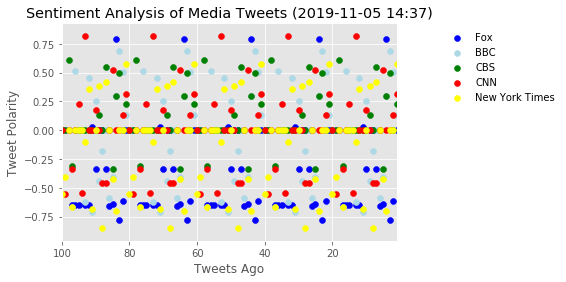

In [55]:
# Create plot
x_vals_fox = fox_pd["Tweets Ago"]
y_vals_fox = fox_pd["Compound"]
x_vals_bbc = bbc_pd["Tweets Ago"]
y_vals_bbc=bbc_pd["Compound"]
x_vals_cbs = cbs_pd["Tweets Ago"]
y_vals_cbs=cbs_pd["Compound"]
x_vals_cnn = cnn_pd["Tweets Ago"]
y_vals_cnn=cnn_pd["Compound"]
x_vals_nyt = nyt_pd["Tweets Ago"]
y_vals_nyt=nyt_pd["Compound"]

plt.scatter(x_vals_fox, y_vals_fox, color='blue', label='Fox')
plt.scatter(x_vals_bbc, y_vals_bbc, color='lightblue', label='BBC')
plt.scatter(x_vals_cbs, y_vals_cbs, color='green', label='CBS')
plt.scatter(x_vals_cnn, y_vals_cnn, color='red', label='CNN')
plt.scatter(x_vals_nyt, y_vals_nyt, color='yellow', label='New York Times')
plt.legend(loc="upper right", bbox_to_anchor=(1.5,1), frameon=False)


# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Media Tweets ({now})")
plt.xlim([x_vals.max(),x_vals.min()]) 
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

#Saving and displaying chart

plt.savefig("Sentiment Analysis.png")

plt.show()

In [56]:
fox_avg=fox_pd["Compound"].mean()
bbc_avg=bbc_pd["Compound"].mean()
cbs_avg=cbs_pd["Compound"].mean()
cnn_avg=cnn_pd["Compound"].mean()
nyt_avg=nyt_pd["Compound"].mean()


y_min=min(fox_avg, bbc_avg, cbs_avg, cnn_avg, nyt_avg)
y_max=max(fox_avg, bbc_avg, cbs_avg, cnn_avg, nyt_avg)

ylim=(y_min-1, y_max+1)



In [57]:
bar_data=[['Fox', fox_avg], ['BBC', bbc_avg], ['CBS', cbs_avg], ['CNN', cnn_avg], ['New York Times', nyt_avg]]
bar_pd=pd.DataFrame(bar_data, columns=['Media', 'TweetPolarity'])
bar_pd

,Media,TweetPolarity
0,Fox,-0.289695
1,BBC,-0.039115
2,CBS,0.082825
3,CNN,-0.008130
4,New York Times,-0.132400


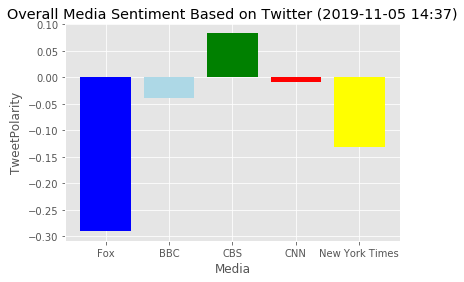

In [58]:
plt.bar(bar_pd['Media'], bar_pd['TweetPolarity'], color=['blue', 'lightblue','green','red', 'yellow'])
plt.xlabel("Media")
plt.ylabel("TweetPolarity")
plt.title(f"Overall Media Sentiment Based on Twitter ({now})")

#Saving and displaying chart

plt.savefig("Overall Media Sentiment Based on Twitter.png")
plt.show()